# phase1_result_analyze

2017-05-25

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,date,time
import copy

In [2]:
%matplotlib inline

### 录入目标数据

In [5]:
travel_time_targets = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/phase1_target_values_travel_time.csv')
volume_targets = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/phase1_target_values_volume.csv')

### 分析下目标数据情况

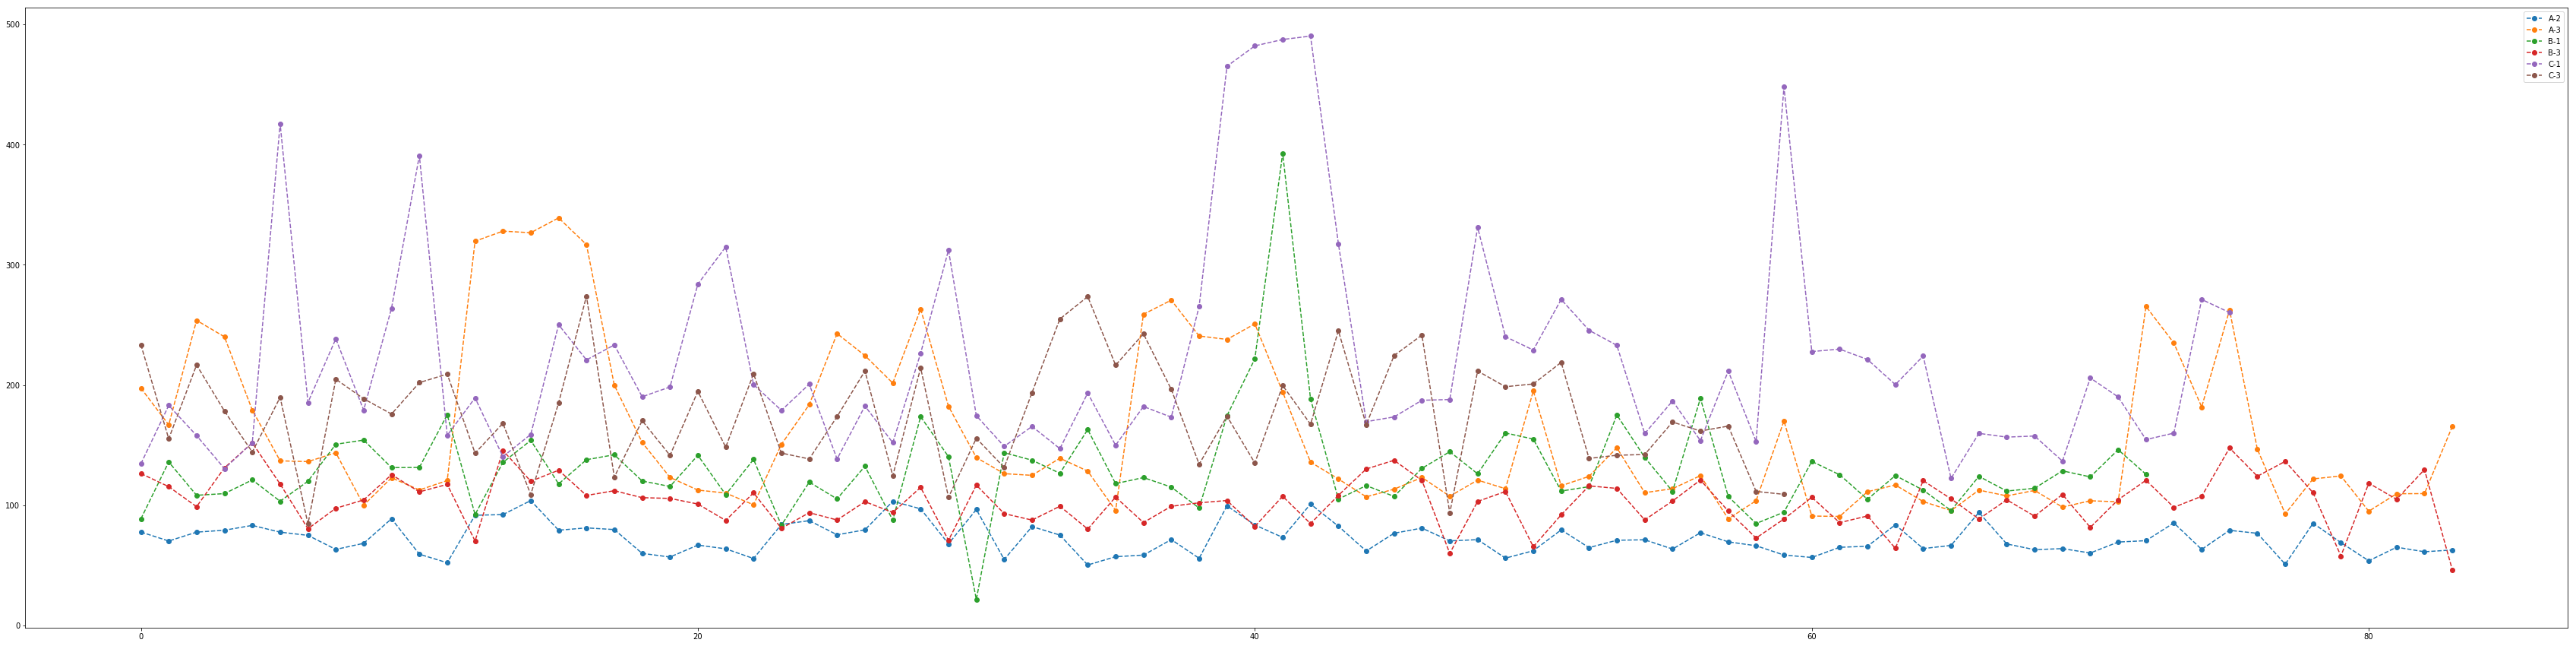

In [12]:
# 先分析下目标值的情况
time_true = temp1.groupby(['intersection_id', 'tollgate_id'])
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
ax = fig.add_subplot(1,1,1)
for (k1,k2),group in time_true:
    route = str(k1) + '-' + str(k2)
    ax.plot(np.arange(len(group)), group['true_value'], '--o', label=route)
    ax.legend()

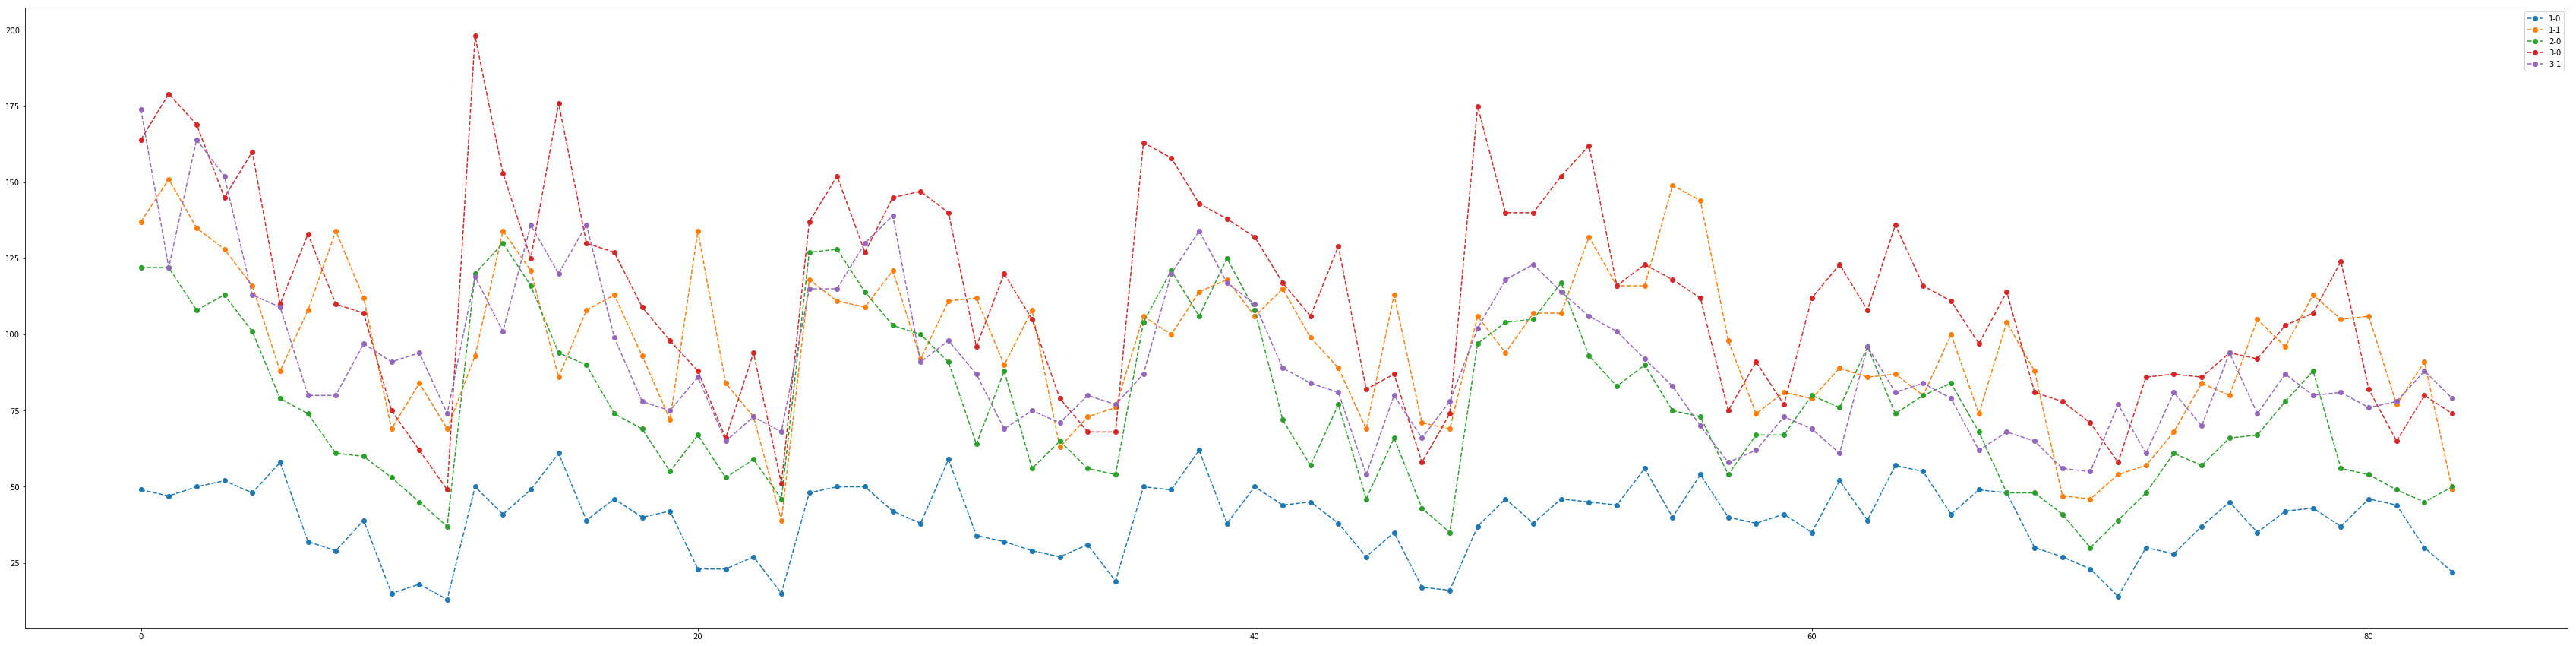

In [13]:
volume_true = temp2.groupby(['tollgate_id', 'direction'])
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
ax = fig.add_subplot(1,1,1)
for (k1,k2),group in volume_true:
    pair = str(k1) + '-' + str(k2)
    ax.plot(np.arange(len(group)), group['true_value'], '--o', label=pair)
    ax.legend()

In [69]:
# 读入seq分析
seq_travel_time = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25时间窗包含seq/phase1_target_values_travel_time.csv')

In [98]:
seq_group = seq_travel_time.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in seq_group:
    print(k1,k2)
    temp = group.sort_values(by='avg_travel_time', ascending=False)
    name = str(k1) + '-' + str(k2) + '.csv'
    temp.to_csv(name)
    for i in range(10):
        print('## %-5s -> %-80s' % (temp['avg_travel_time'].iloc[i], temp['seq'].iloc[i]))

A 2
## 103.94 -> 119.7 & 114.0 & 122.7 & 17.3 & 122.4 & 91.5 & 113.3 & 136.3 & 118.9 & 113.8 & 106.2 & 116.9 & 72.9 & 81.0 & 123.1 & 93.0
## 103.35 -> 129.9 & 174.6 & 135.8 & 110.9 & 127.5 & 120.4 & 37.9 & 120.0 & 74.4 & 50.4 & 57.6 & 112.6 & 134.2 & 81.9 & 81.9
## 101.05 -> 97.5 & 86.0 & 10.9 & 99.0 & 109.9 & 144.6 & 118.2 & 142.2                       
## 99.53 -> 66.6 & 83.1 & 48.4 & 125.6 & 124.4 & 120.4 & 98.8 & 65.3 & 127.0 & 62.3 & 85.6 & 107.0 & 75.7 & 65.3 & 56.1 & 187.1 & 193.2
## 97.05 -> 54.0 & 65.3 & 73.8 & 65.1 & 114.9 & 118.5 & 81.6 & 102.2 & 93.8 & 124.2 & 160.6 & 124.1 & 116.7 & 77.8 & 118.8 & 66.4 & 115.7 & 134.0 & 105.5 & 34.1 & 90.9
## 96.52 -> 199.2 & 145.6 & 98.9 & 59.1 & 73.0 & 61.8 & 63.8 & 70.7                         
## 94.08 -> 74.4 & 117.2 & 73.1 & 77.9 & 24.6 & 173.2 & 172.0 & 124.8 & 93.4 & 147.5 & 85.7 & 56.0 & 90.5 & 74.3 & 26.6
## 92.28 -> 108.5 & 26.2 & 83.1 & 90.8 & 122.1 & 88.2 & 75.8 & 133.8 & 84.9 & 171.9 & 93.3 & 129.2 & 62.4 & 21.8
## 91.72 -> 6

In [100]:
trajectories = pd.read_csv('/home/godcedric/Jupyter_Notebook/平均时间与link分析/trajectories(table_5)_training2.csv')
volume = pd.read_csv('/home/godcedric/Jupyter_Notebook/平均时间与link分析/volume(table 6)_training2.csv')
trajectories = trajectories.sort_values(by=['intersection_id', 'tollgate_id'])
volume = volume.sort_values(by=['tollgate', 'direction'])
trajectories.to_csv('/home/godcedric/Jupyter_Notebook/平均时间与link分析/trajectories.csv', index=False)
volume.to_csv('/home/godcedric/Jupyter_Notebook/平均时间与link分析/volume.csv', index=False)

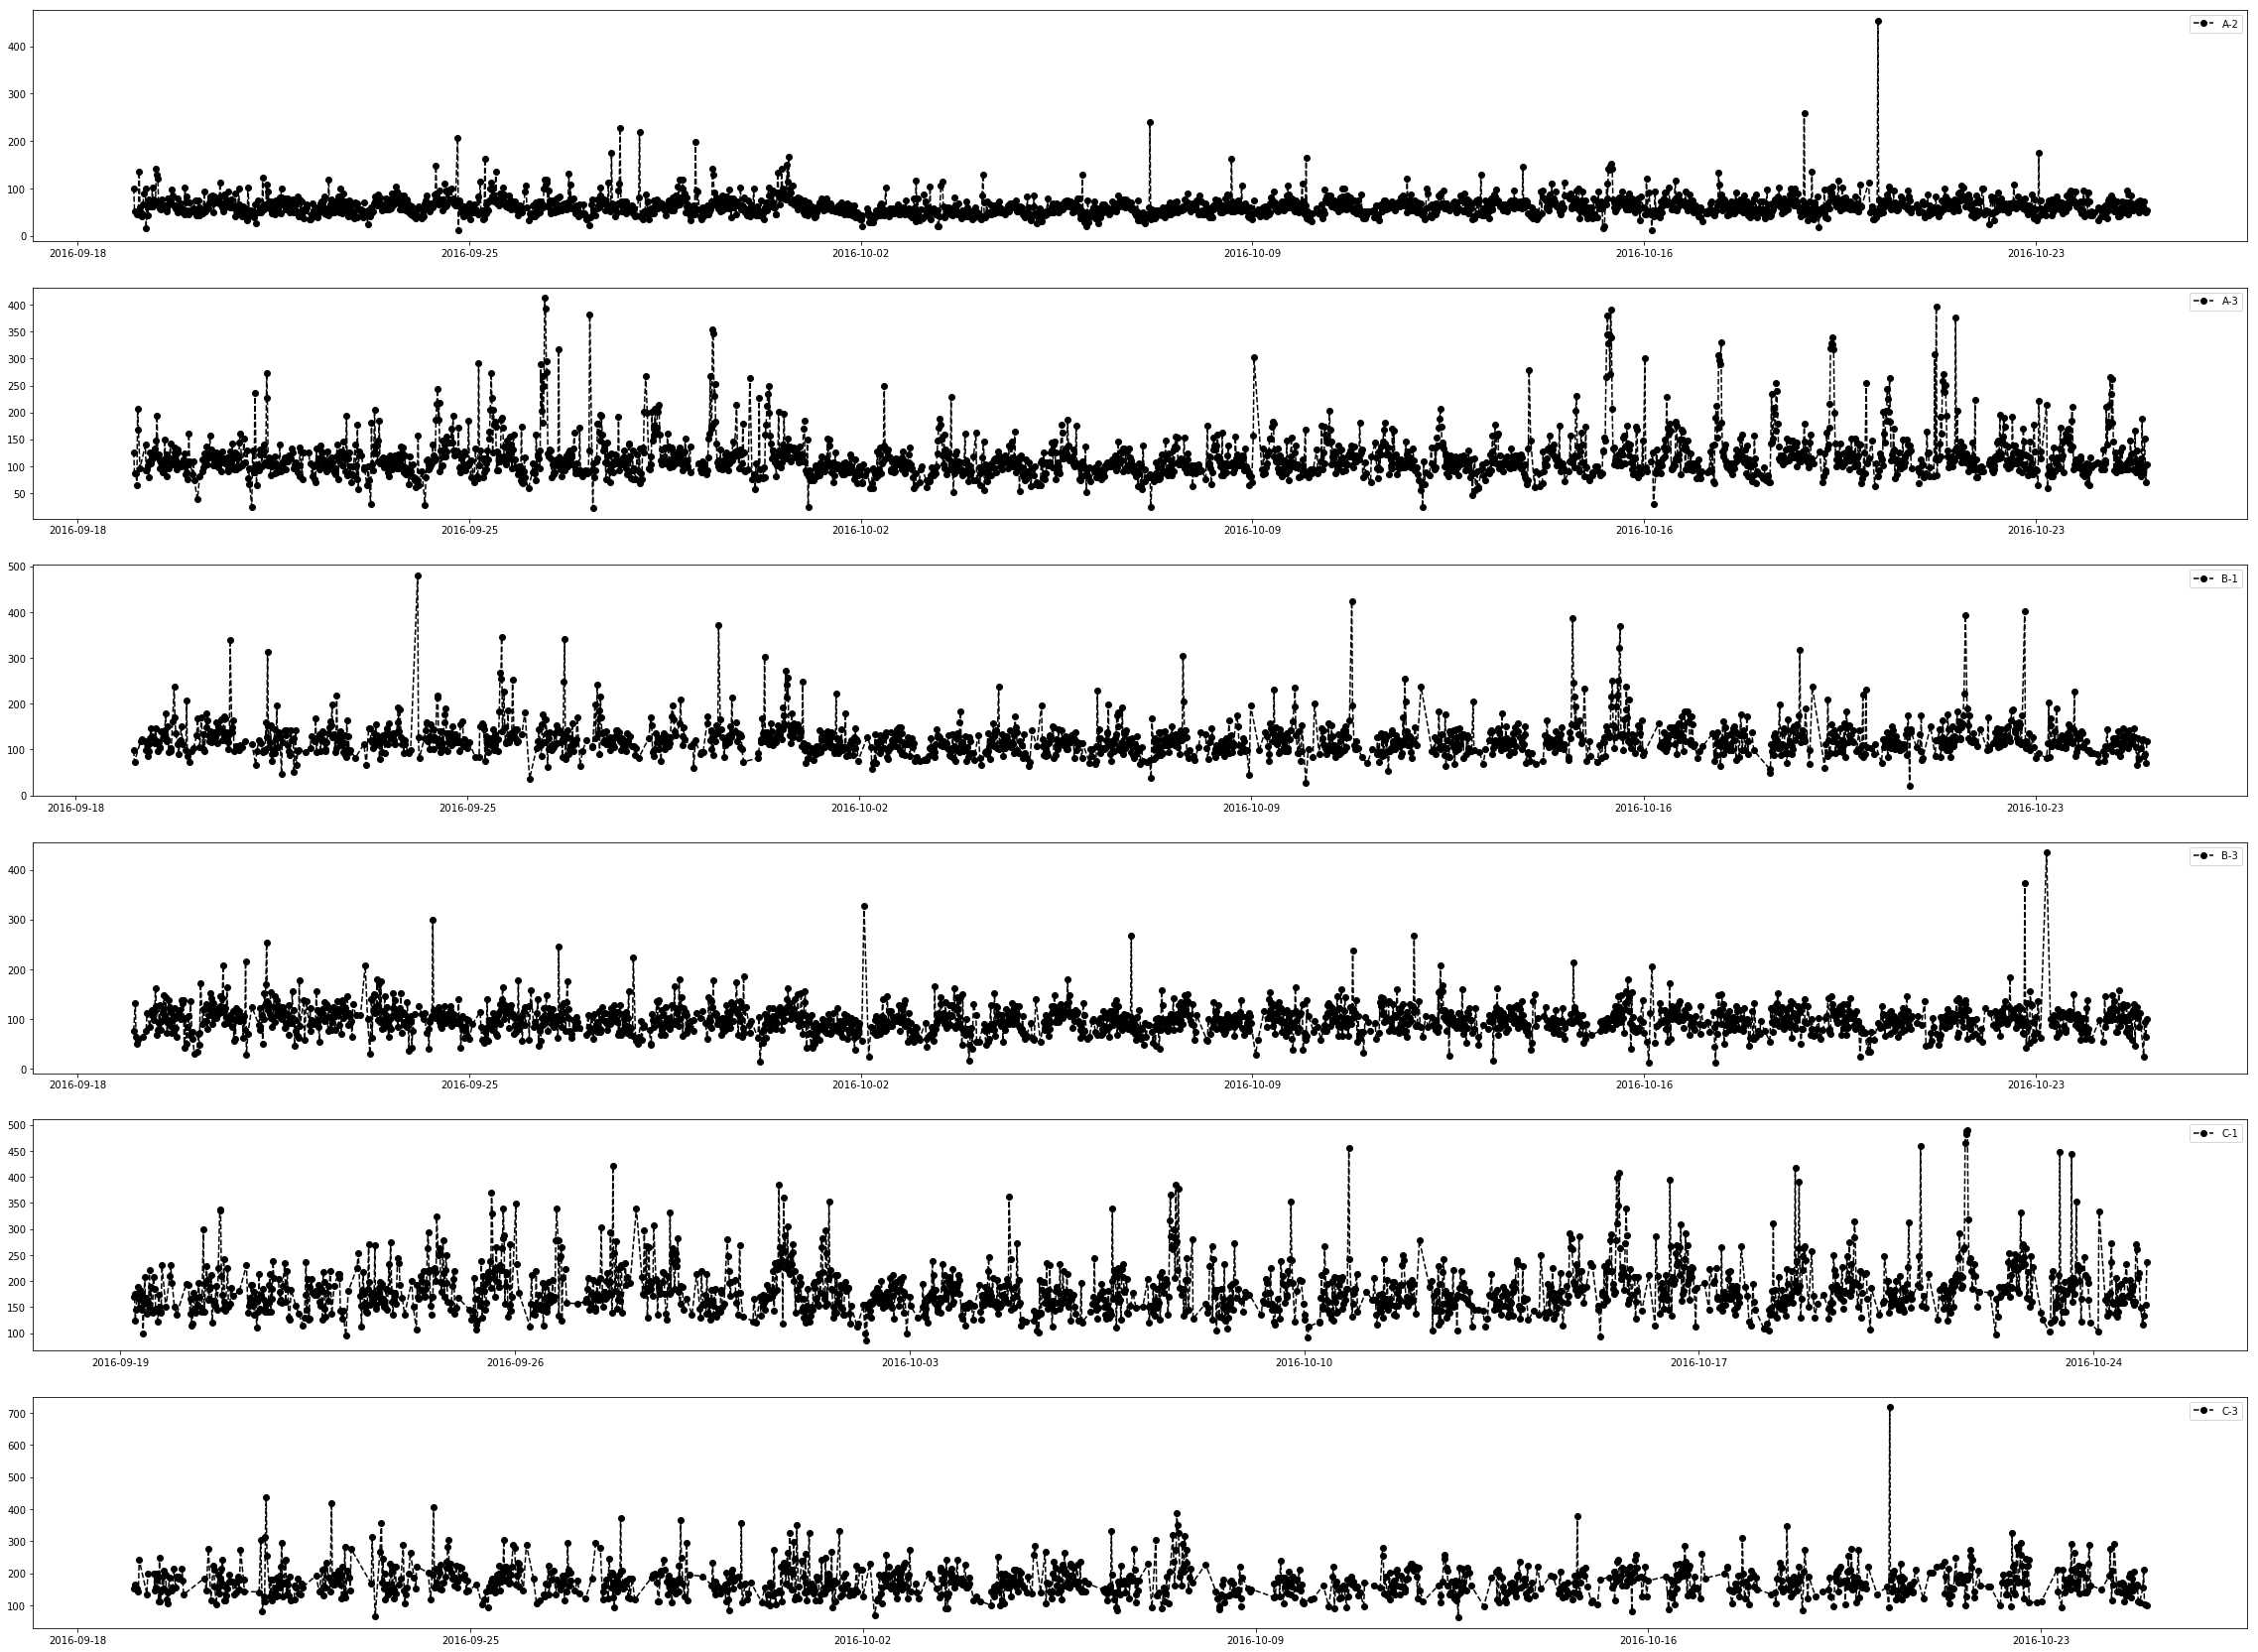

In [34]:
# 录入10月之前的信息
raw_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/training_20min_avg_travel_time.csv')
raw_data['start_time'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))

raw_data['date'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:], '%Y-%m-%d %H:%M:%S').date())
start_date = date(2016,9,19)
raw_data = raw_data[raw_data['date'] >= start_date]
del raw_data['date']
raw_data['route'] = raw_data['intersection_id'].astype(str) + '-' + raw_data['tollgate_id'].astype(str)

raw_data_add = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/18_24_full_20min_avg_travel_time.csv')
raw_data_add['start_time'] = raw_data_add['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
raw_data_add['route'] = raw_data_add['intersection_id'].astype(str) + '-' + raw_data_add['tollgate_id'].astype(str)

full_travel_time = pd.concat([raw_data, raw_data_add], axis=0)

full_travel_time = full_travel_time.sort_values(by=['intersection_id','tollgate_id','start_time'])

grouped_by_route = full_travel_time.groupby(['route'])
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(40)
k = 1
for k1, group in grouped_by_route:  
    ax = fig.add_subplot(6,1,k)
    k += 1
    ax.plot(group['start_time'], group['avg_travel_time'],'ko--', label=k1)
    ax.legend()

### 录入10月之前的信息

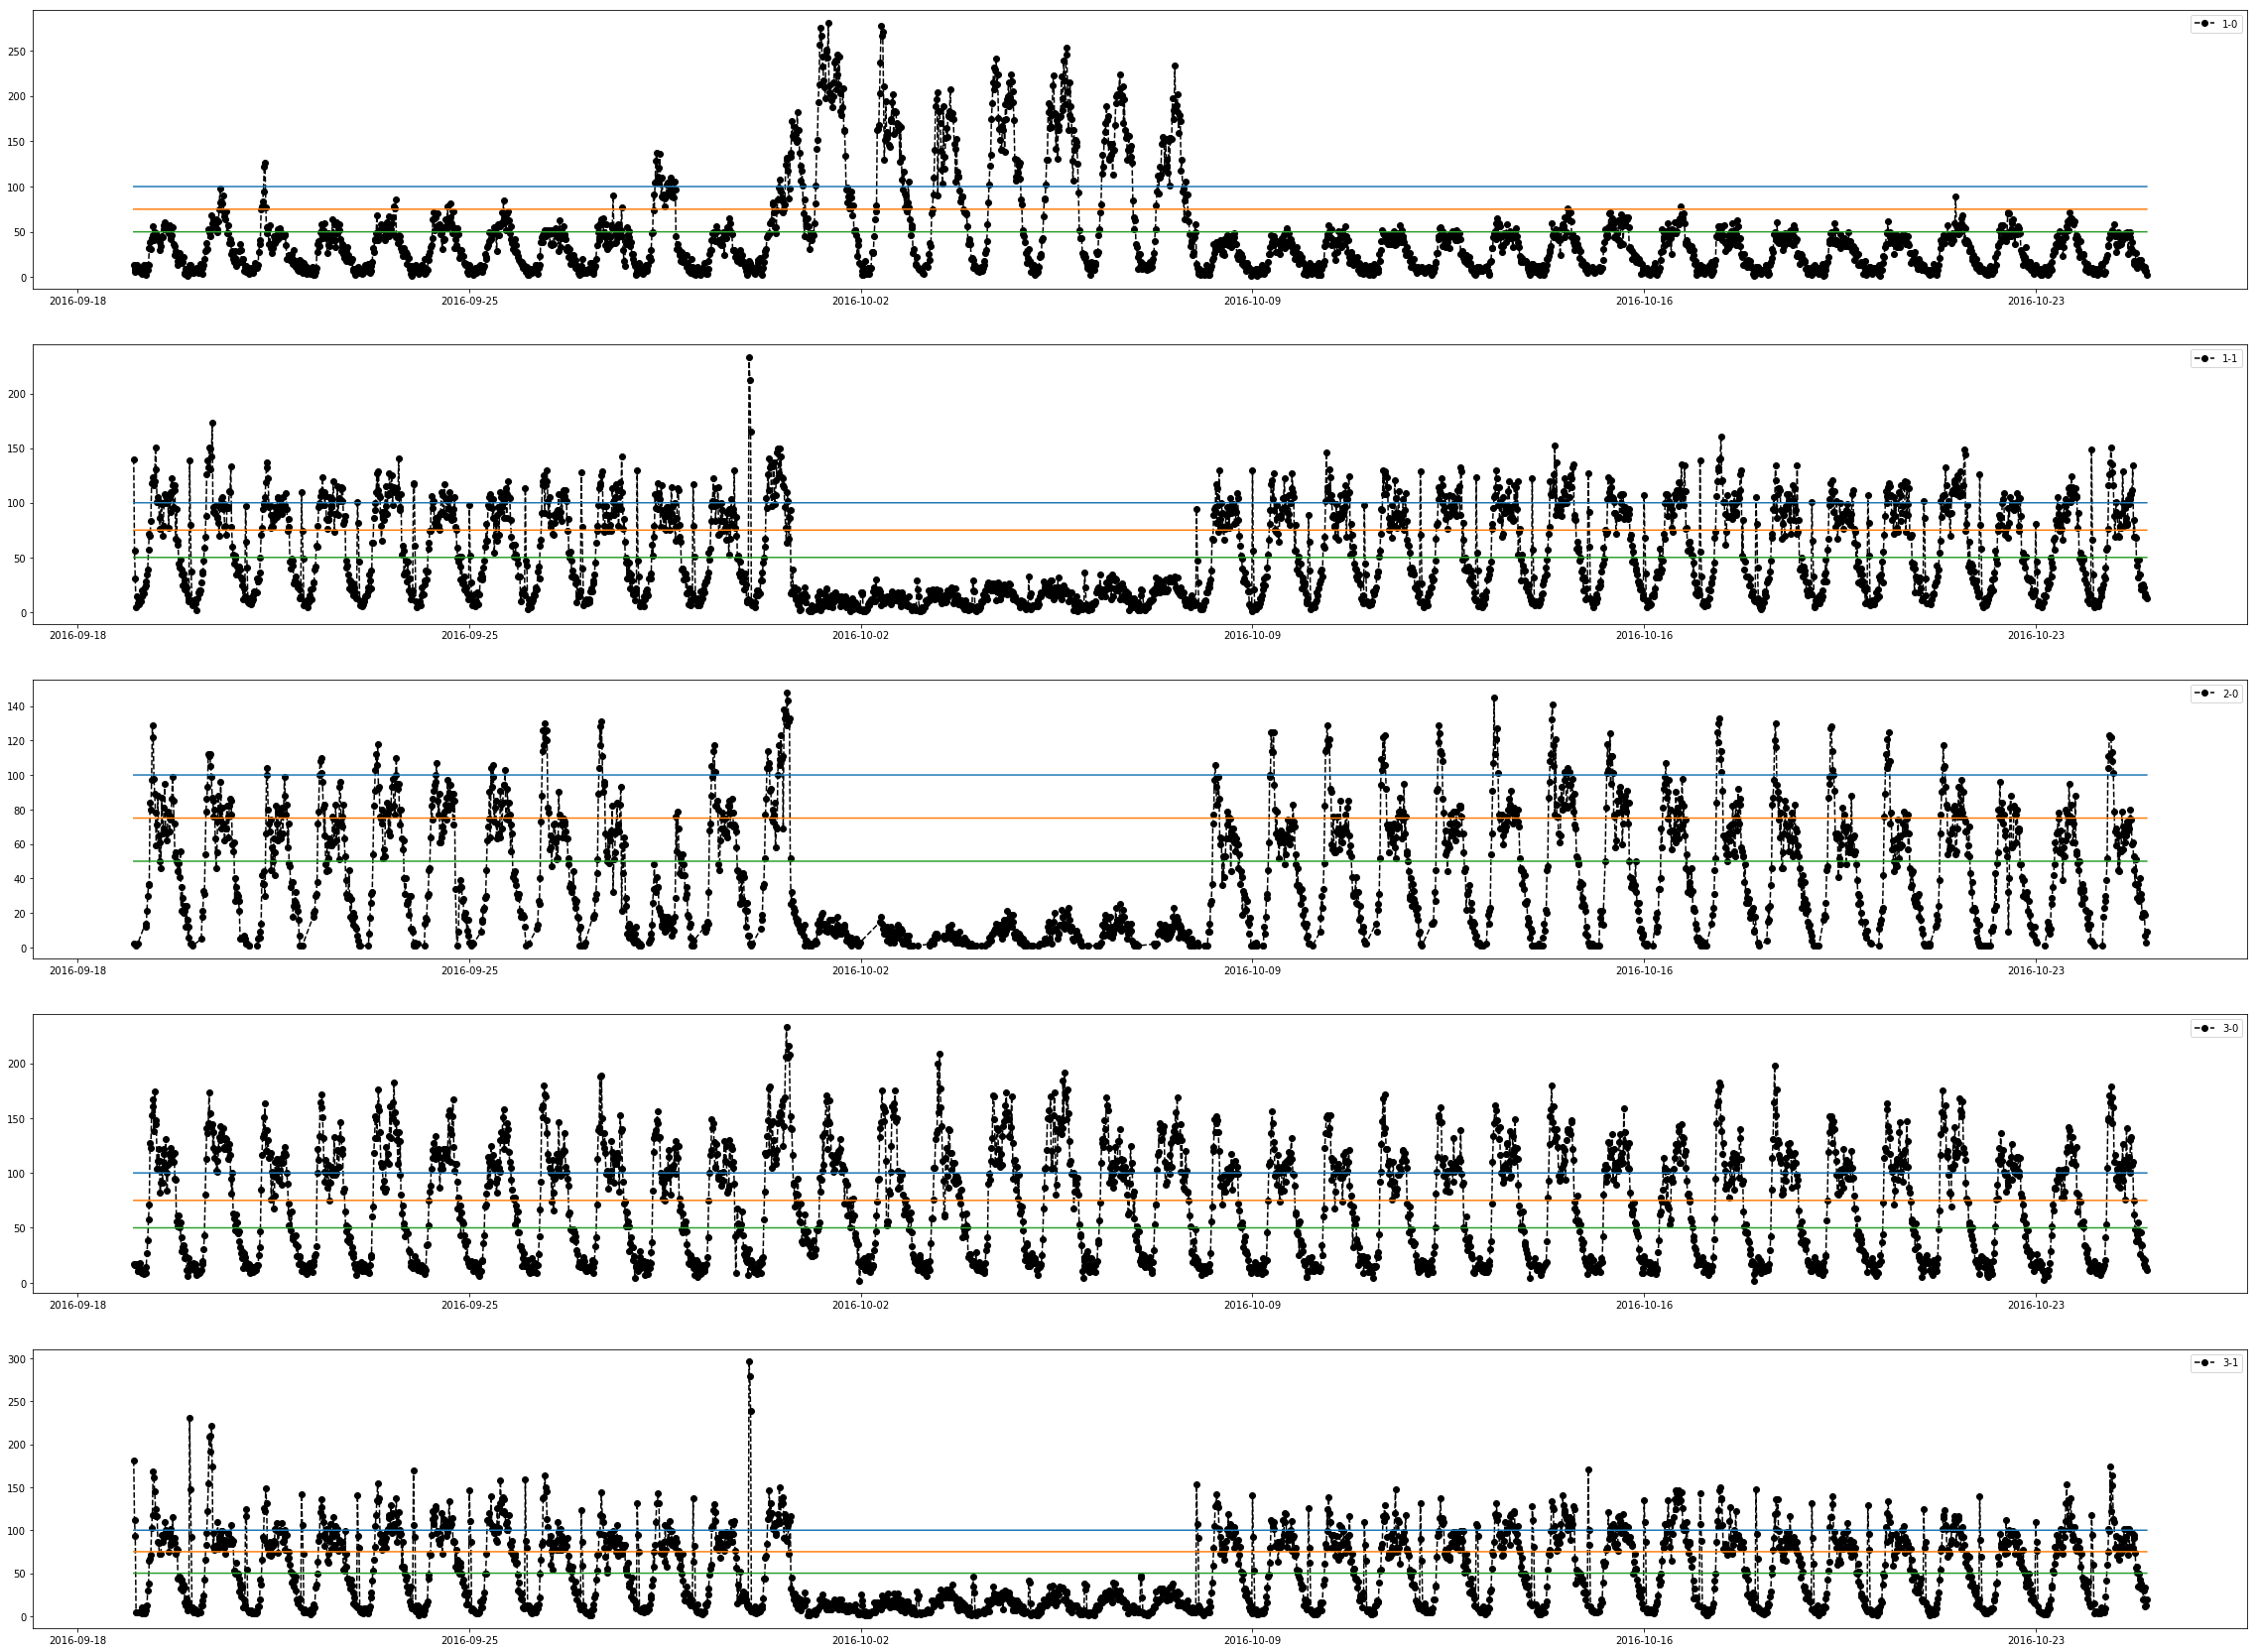

In [42]:
raw_data = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/初始形成时间窗的数据集/training_20min_avg_volume.csv')
raw_data['start_time'] = raw_data['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))

raw_data['pair'] = raw_data['tollgate_id'].astype(str) + '-' + raw_data['direction'].astype(str)

raw_data_add = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/待加工数据集/18_25号时间窗数据/18_24_full_20min_avg_volume.csv')
raw_data_add['start_time'] = raw_data_add['time_window'].map(lambda x: datetime.strptime(x.split(',')[0][1:],'%Y-%m-%d %H:%M:%S'))
raw_data_add['pair'] = raw_data_add['tollgate_id'].astype(str) + '-' + raw_data_add['direction'].astype(str)

full_travel_time = pd.concat([raw_data, raw_data_add], axis=0)

full_travel_time = full_travel_time.sort_values(by=['tollgate_id','direction','start_time'])

grouped_by_pair = full_travel_time.groupby(['pair'])
fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(40)
k = 1
for k1, group in grouped_by_pair:  
    ax = fig.add_subplot(5,1,k)
    k += 1
    ax.plot(group['start_time'], group['volume'],'ko--', label=k1)
    ax.plot(group['start_time'], 100*np.ones(len(group)))
    ax.plot(group['start_time'], 75*np.ones(len(group)))
    ax.plot(group['start_time'], 50*np.ones(len(group)))
    ax.legend()

### 录入预测数据

In [6]:
# 自定义评分函数
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

### 取均值结果分析

In [7]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/mean1.0/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/mean1.0/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

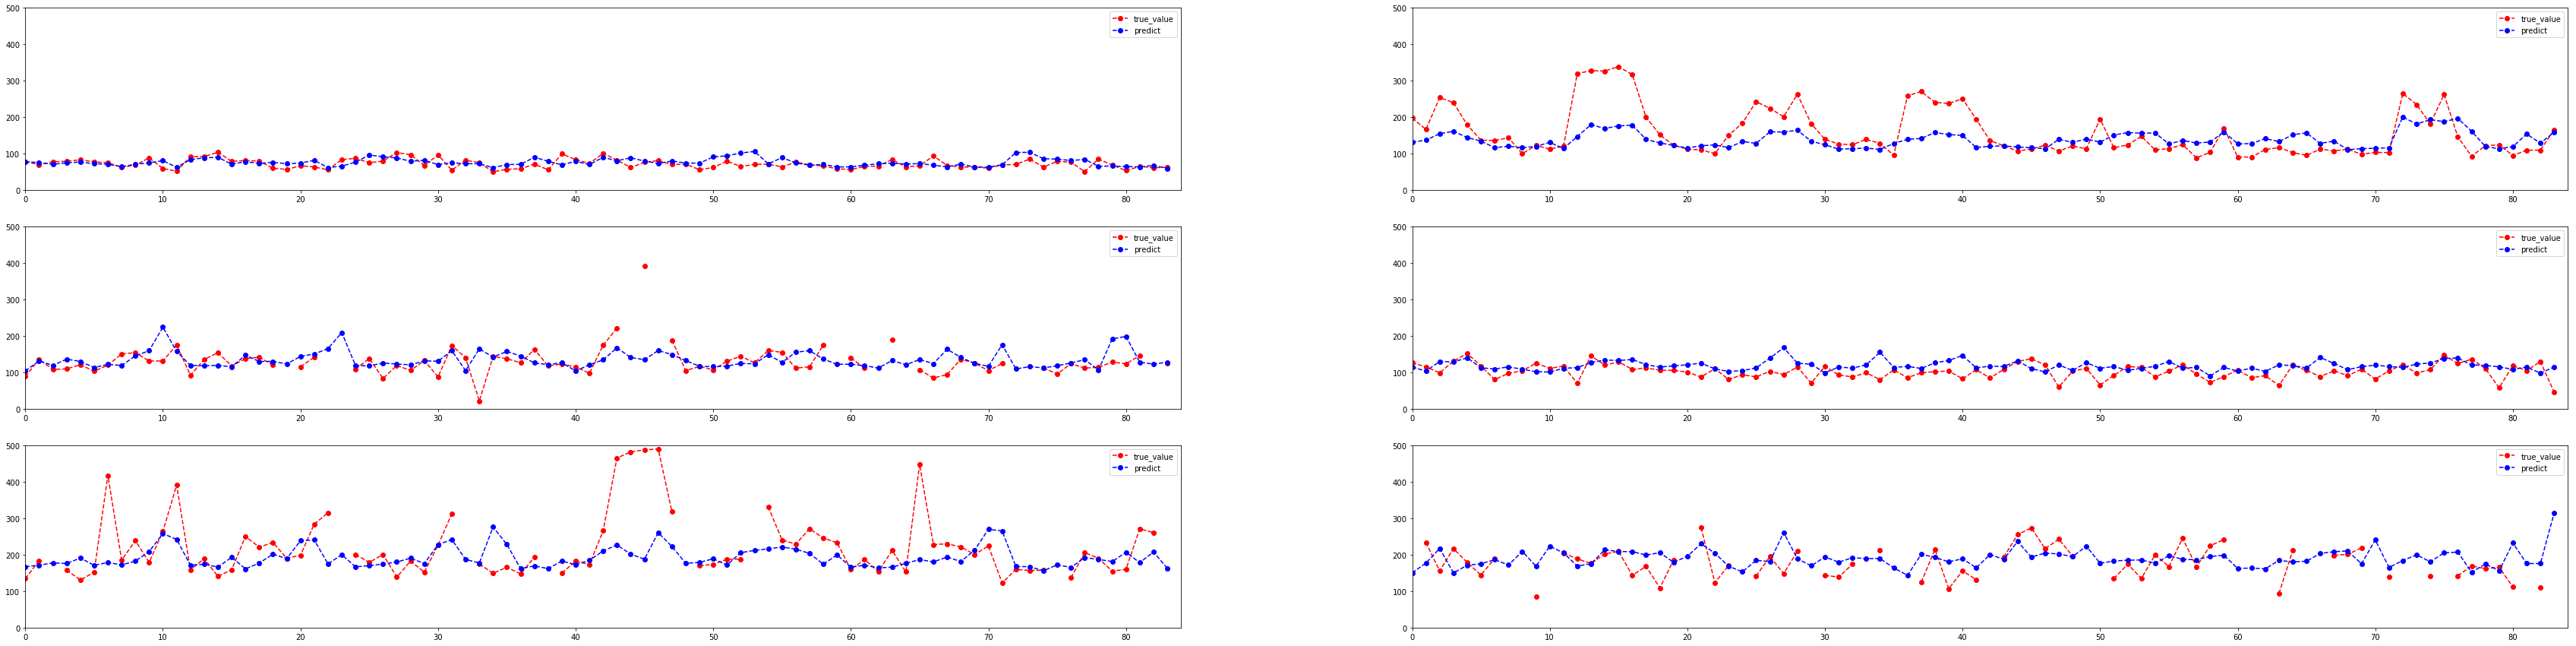

In [8]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [9]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.1630169422931337
A 3
0.24022267041800283
B 1
0.27362254488655163
B 3
0.25233919242619074
C 1
0.21208218197870363
C 3
0.25617009144387975


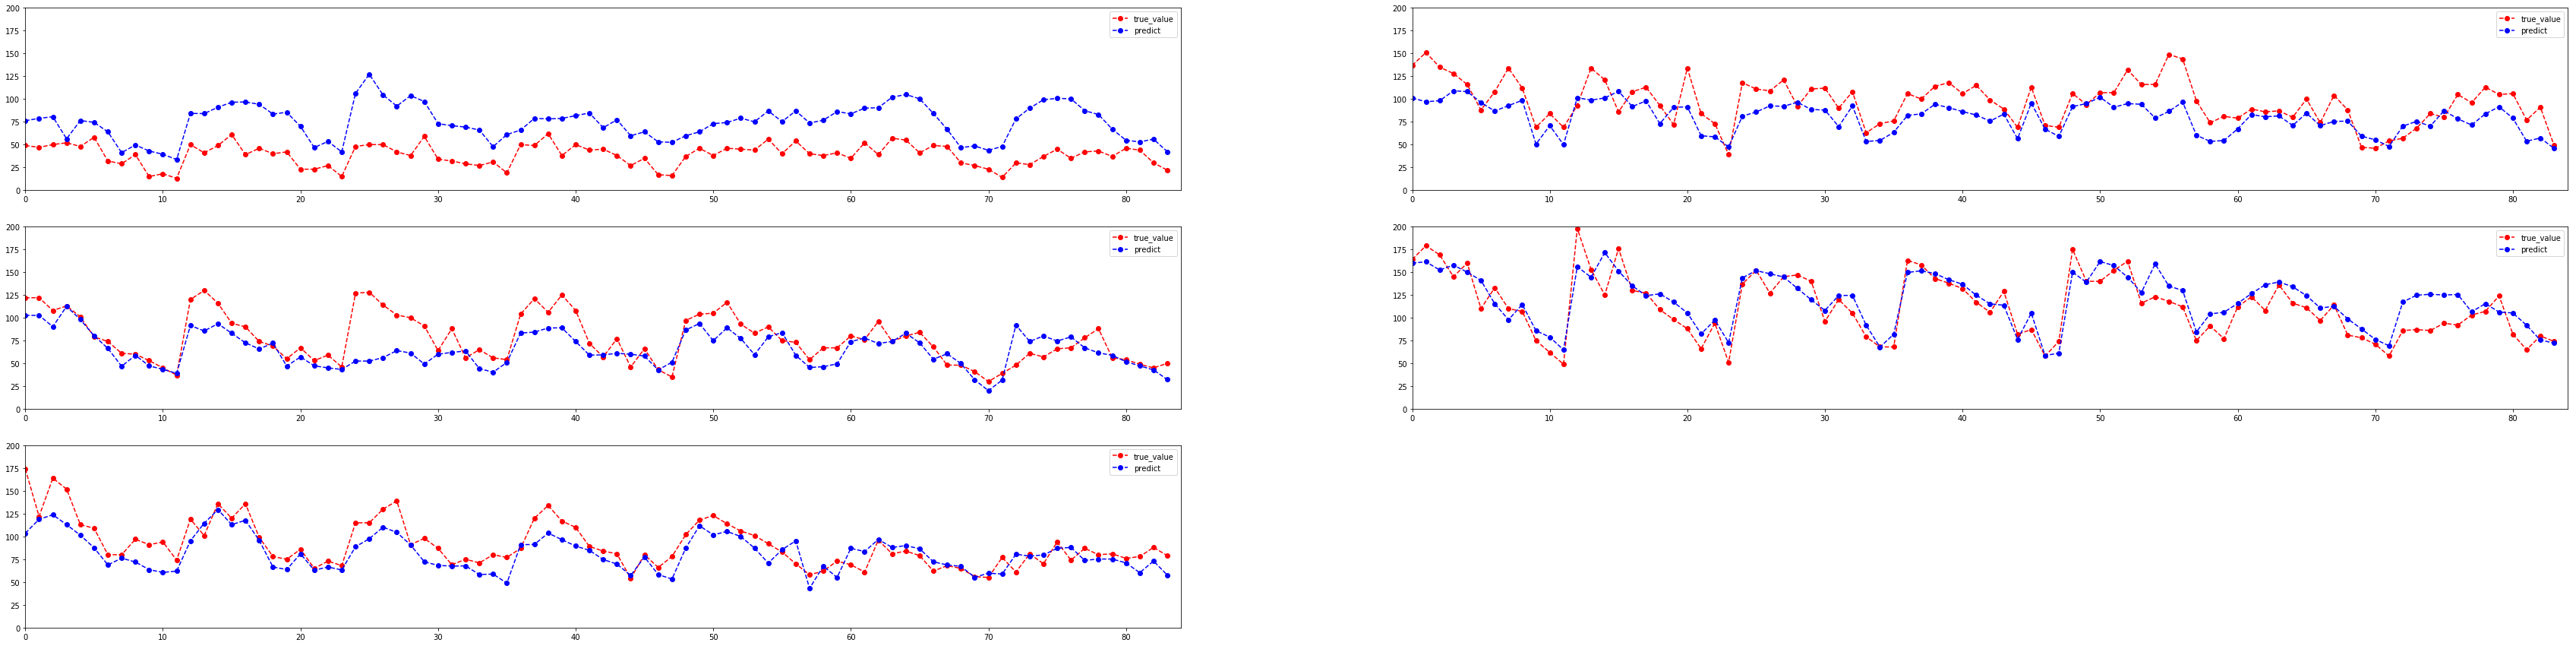

In [10]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [11]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
1.0120009597710837
1 1
0.1965072084371975
2 0
0.19771284313154447
3 0
0.14418311451999993
3 1
0.1499427344779455


### xgboost结果分析

In [13]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/xgboost1.0/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/xgboost1.0/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

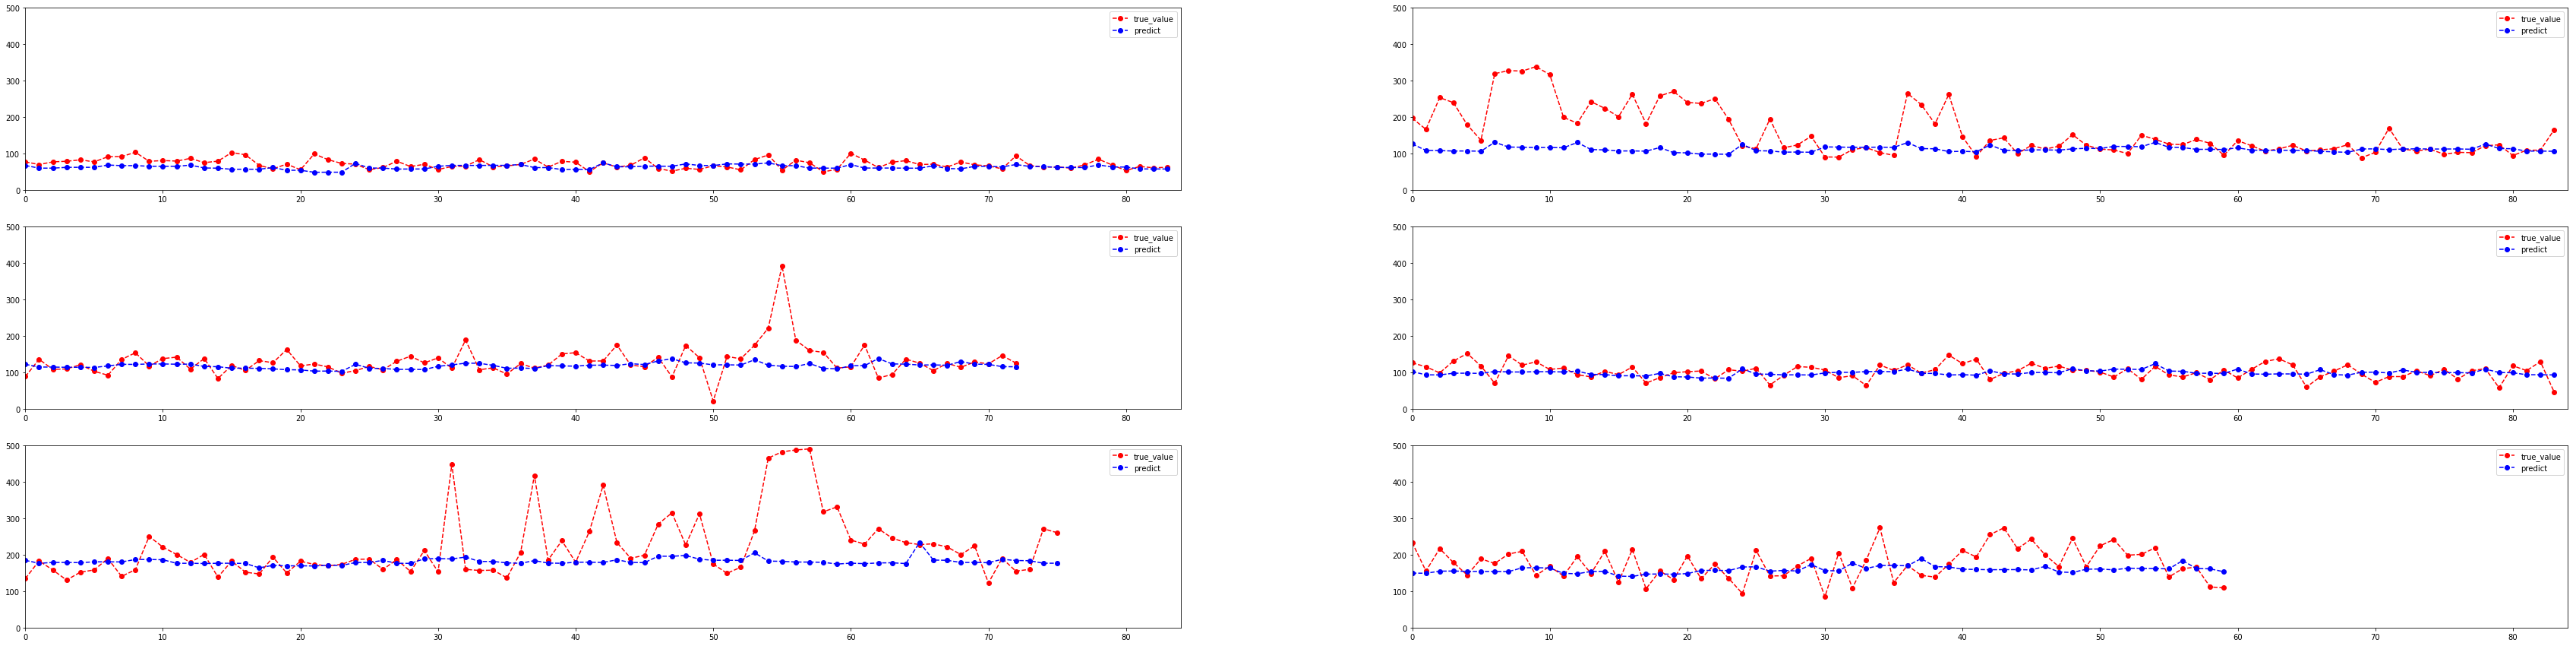

In [11]:
#temp1 = temp1.fillna(0)
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [9]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.1615764199964384
A 3
0.2552312859629452
B 1
0.22868928487198498
B 3
0.1846220518943353
C 1
0.21795506929132996
C 3
0.22607067146370718


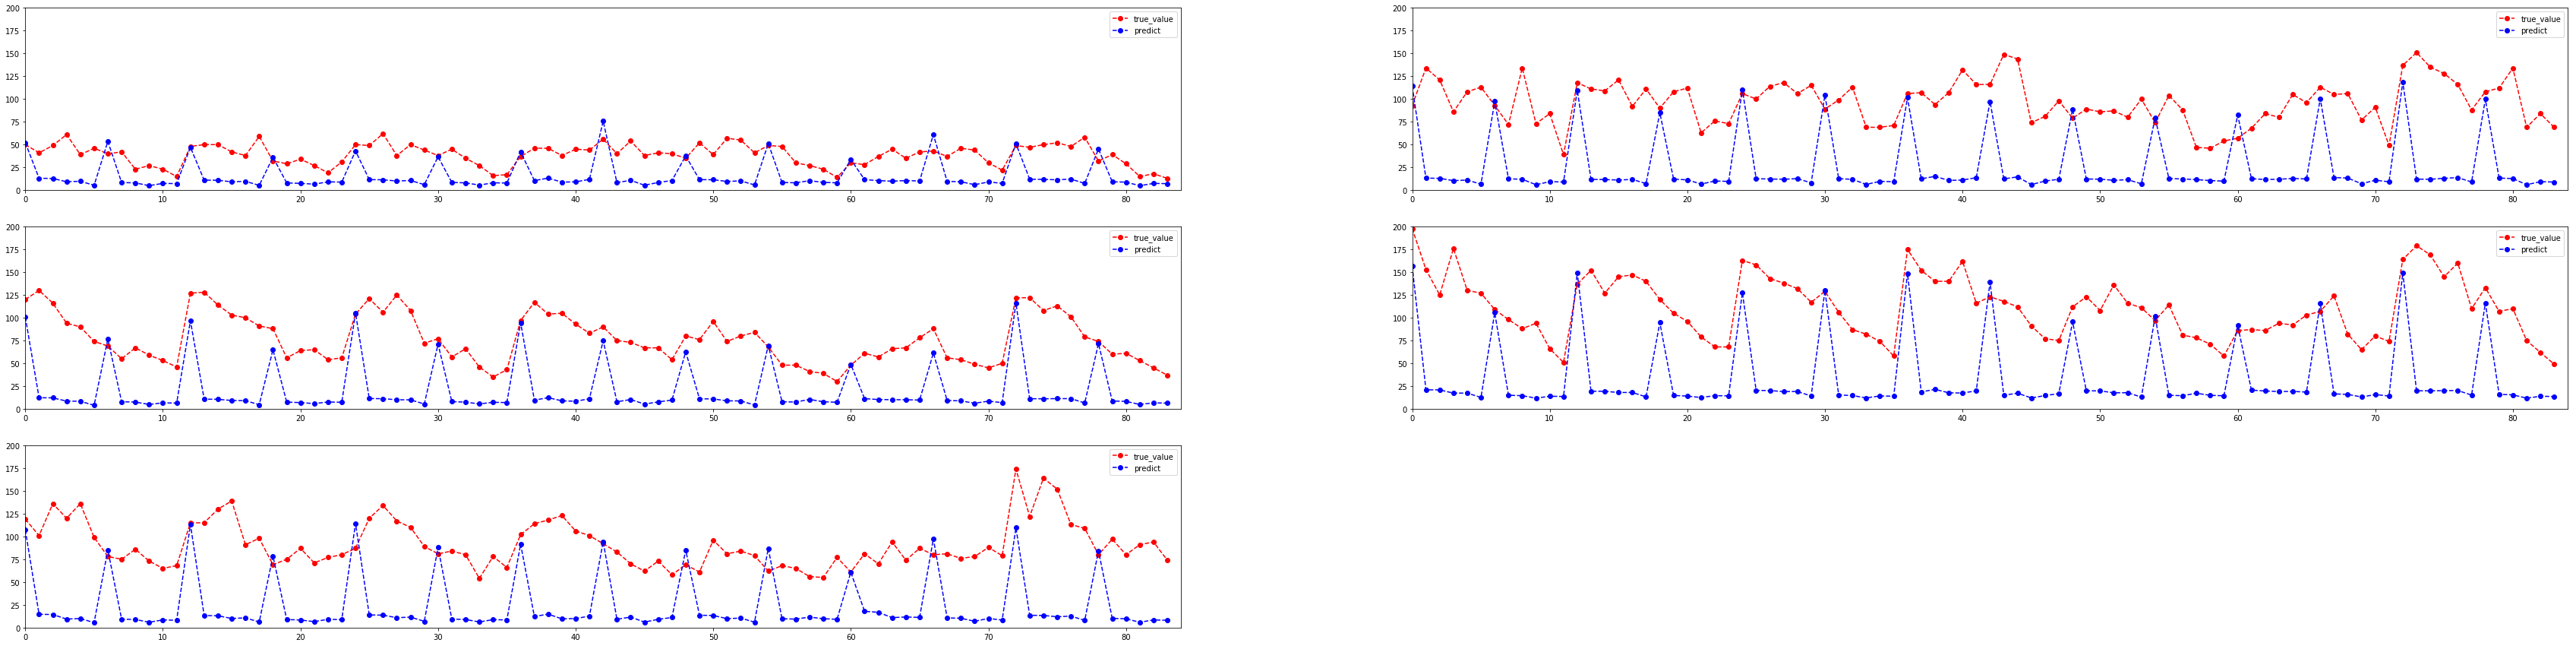

In [16]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [17]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.6415171093830153
1 1
0.7542540214643032
2 0
0.7504228737437499
3 0
0.7167569570673139
3 1
0.7618914646558338


### RF结果分析

In [18]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/RF1.0/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/RF1.0/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

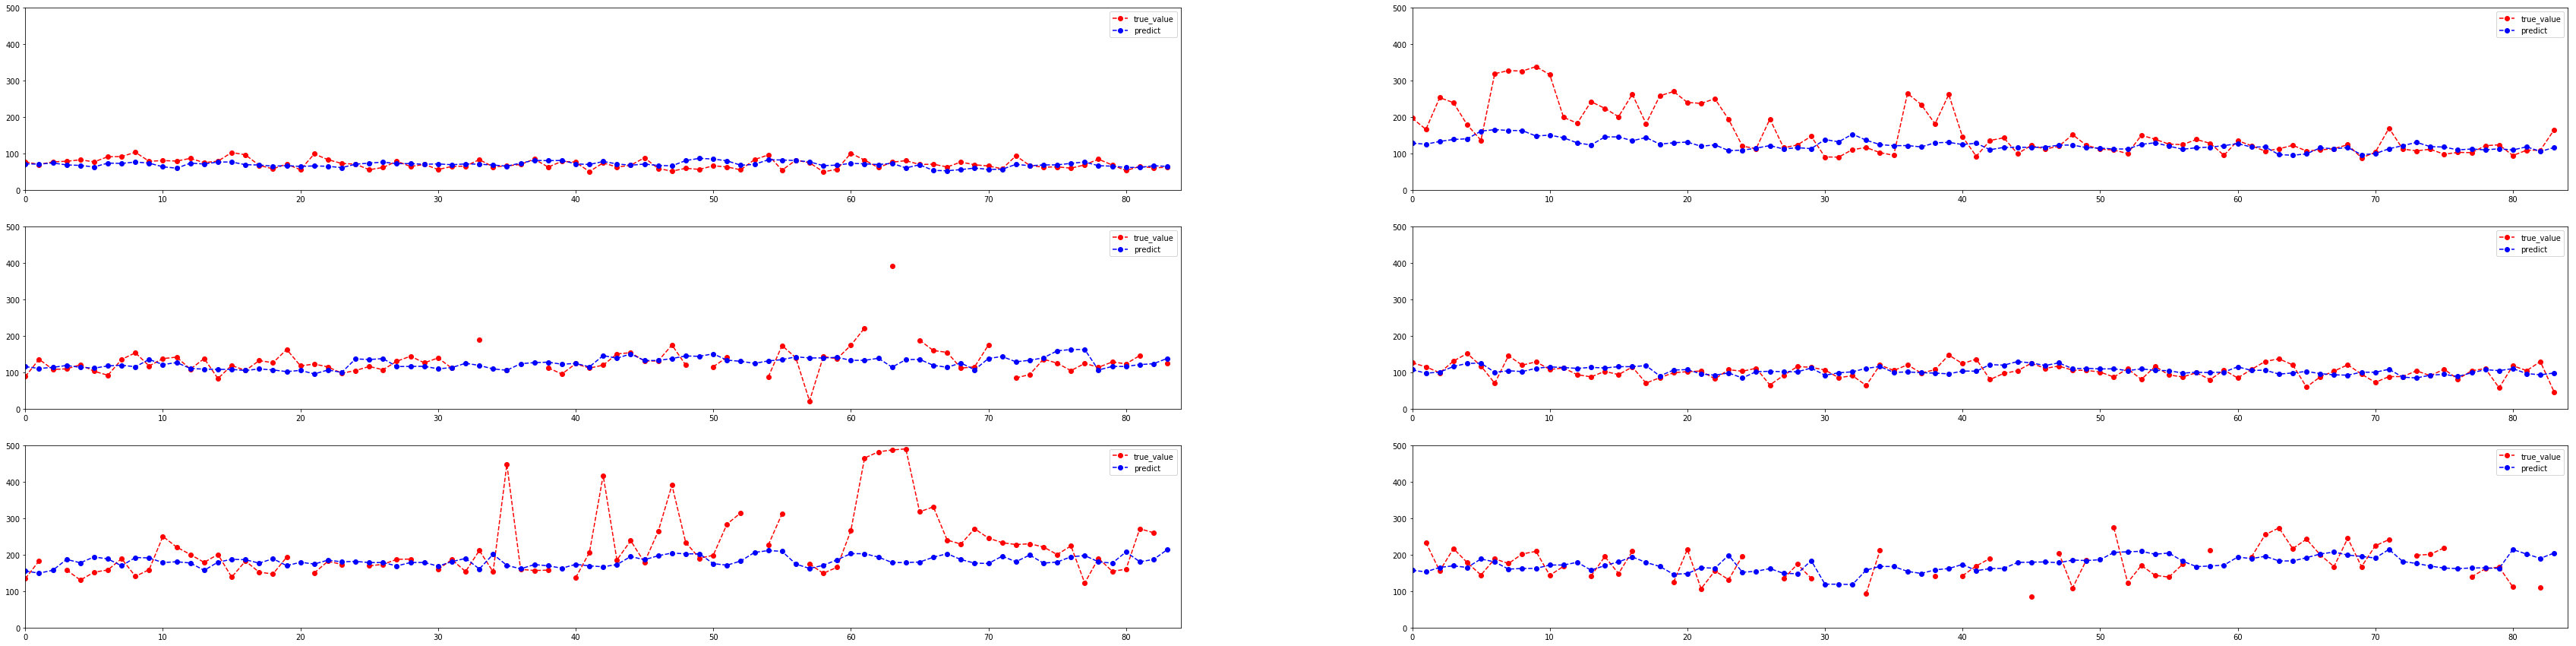

In [19]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [20]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.1536777060662524
A 3
0.23330028901230687
B 1
0.24956399828979187
B 3
0.1833687202639657
C 1
0.22353076716892262
C 3
0.24461200150122794


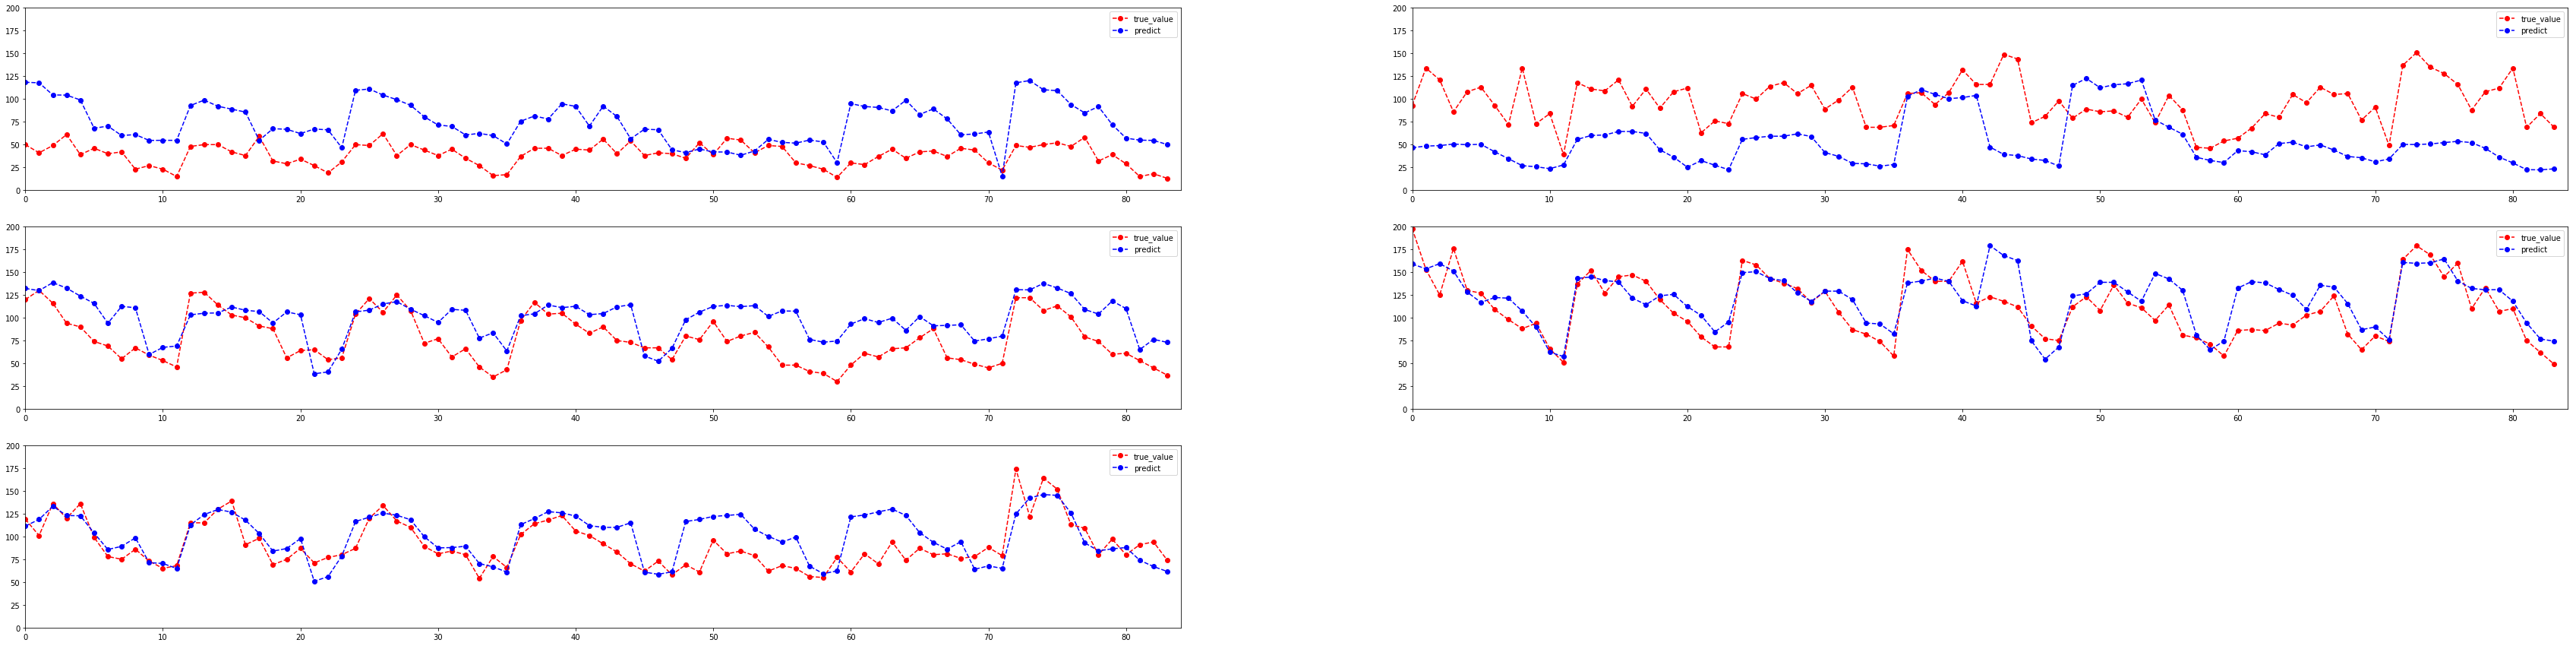

In [21]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [22]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
1.0561307668574327
1 1
0.49167248056603813
2 0
0.4215806126347811
3 0
0.18767711673522833
3 1
0.21061936444698776


### spilt_RF结果分析

In [23]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/splitRF1.0/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/splitRF1.0/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

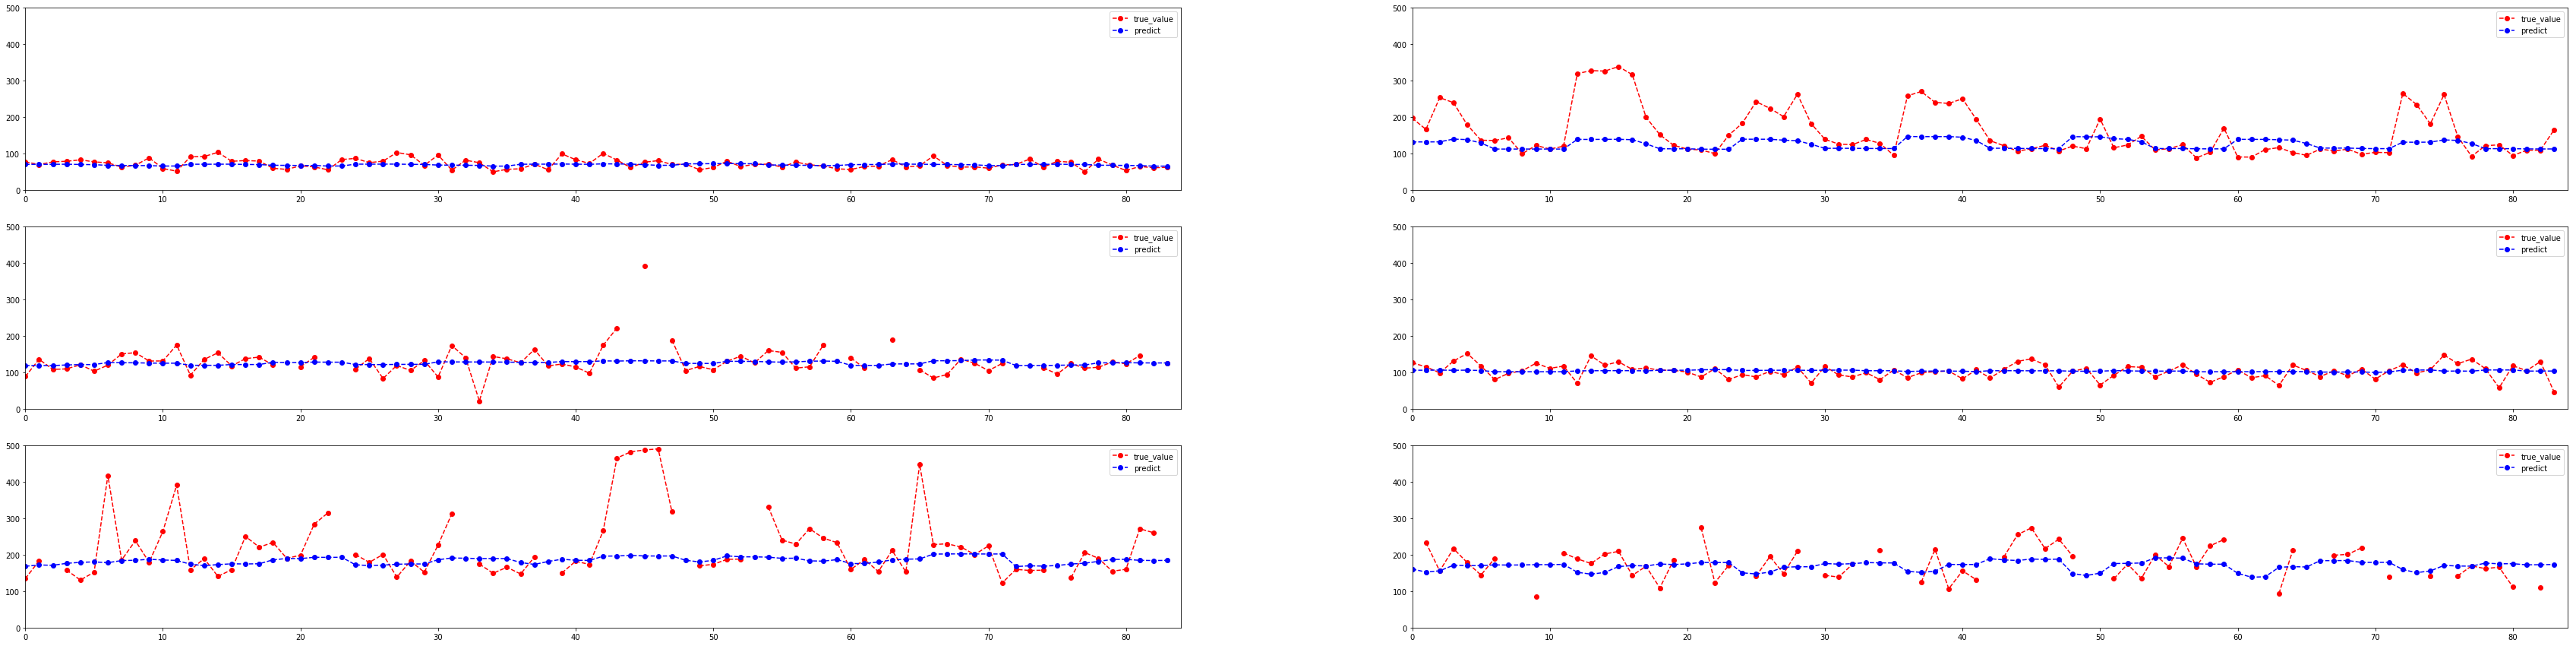

In [24]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [25]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13354567322592803
A 3
0.2341604864668264
B 1
0.2245112828821624
B 3
0.17282289261147665
C 1
0.20984932224849465
C 3
0.2234057837703137


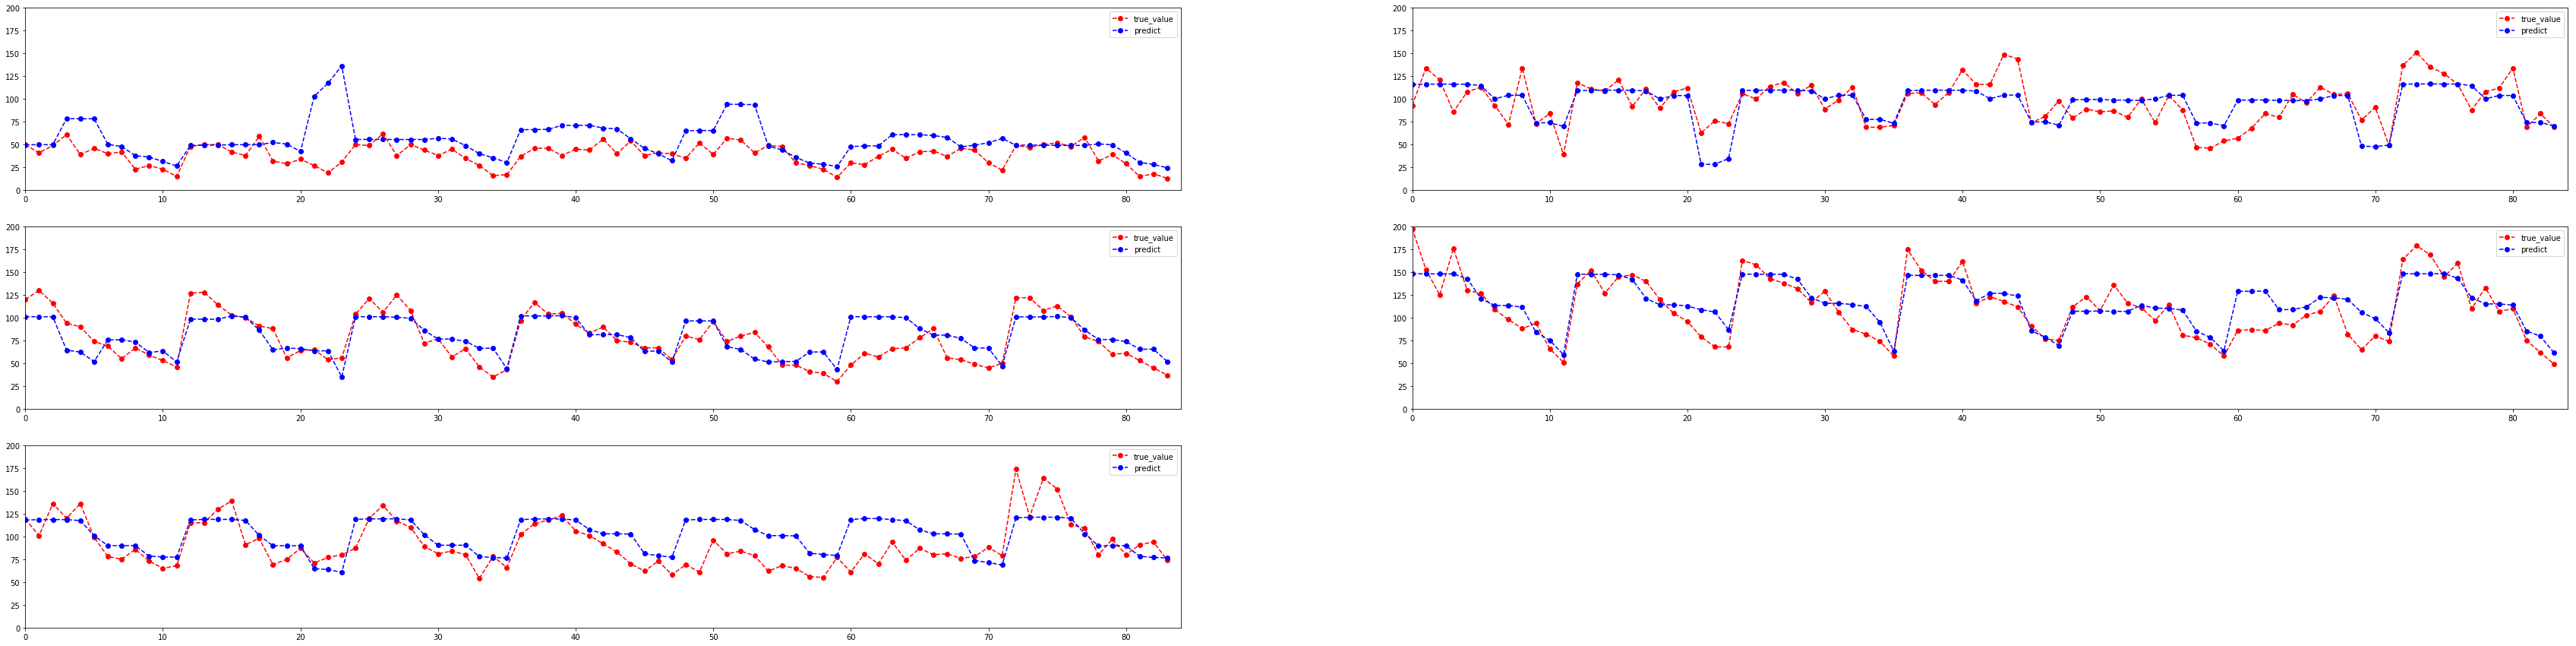

In [26]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [27]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.5363935608810287
1 1
0.1710428041864433
2 0
0.21697662278781443
3 0
0.1485475326703453
3 1
0.21858188789812968


### kNN结果分析

In [28]:
time_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/kNN1.0/travel_time_submission.csv')
volume_predict = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/kNN1.0/volume_submission.csv')

temp1 = pd.merge(time_predict, travel_time_targets, on=['intersection_id','tollgate_id','time_window'], how='left') 
temp2 = pd.merge(volume_predict, volume_targets, on=['tollgate_id','direction','time_window'], how='left')
temp1.columns = ['intersection_id', 'tollgate_id', 'time_window', 'predict', 'true_value']
temp2.columns = ['tollgate_id', 'time_window', 'direction', 'predict', 'true_value']

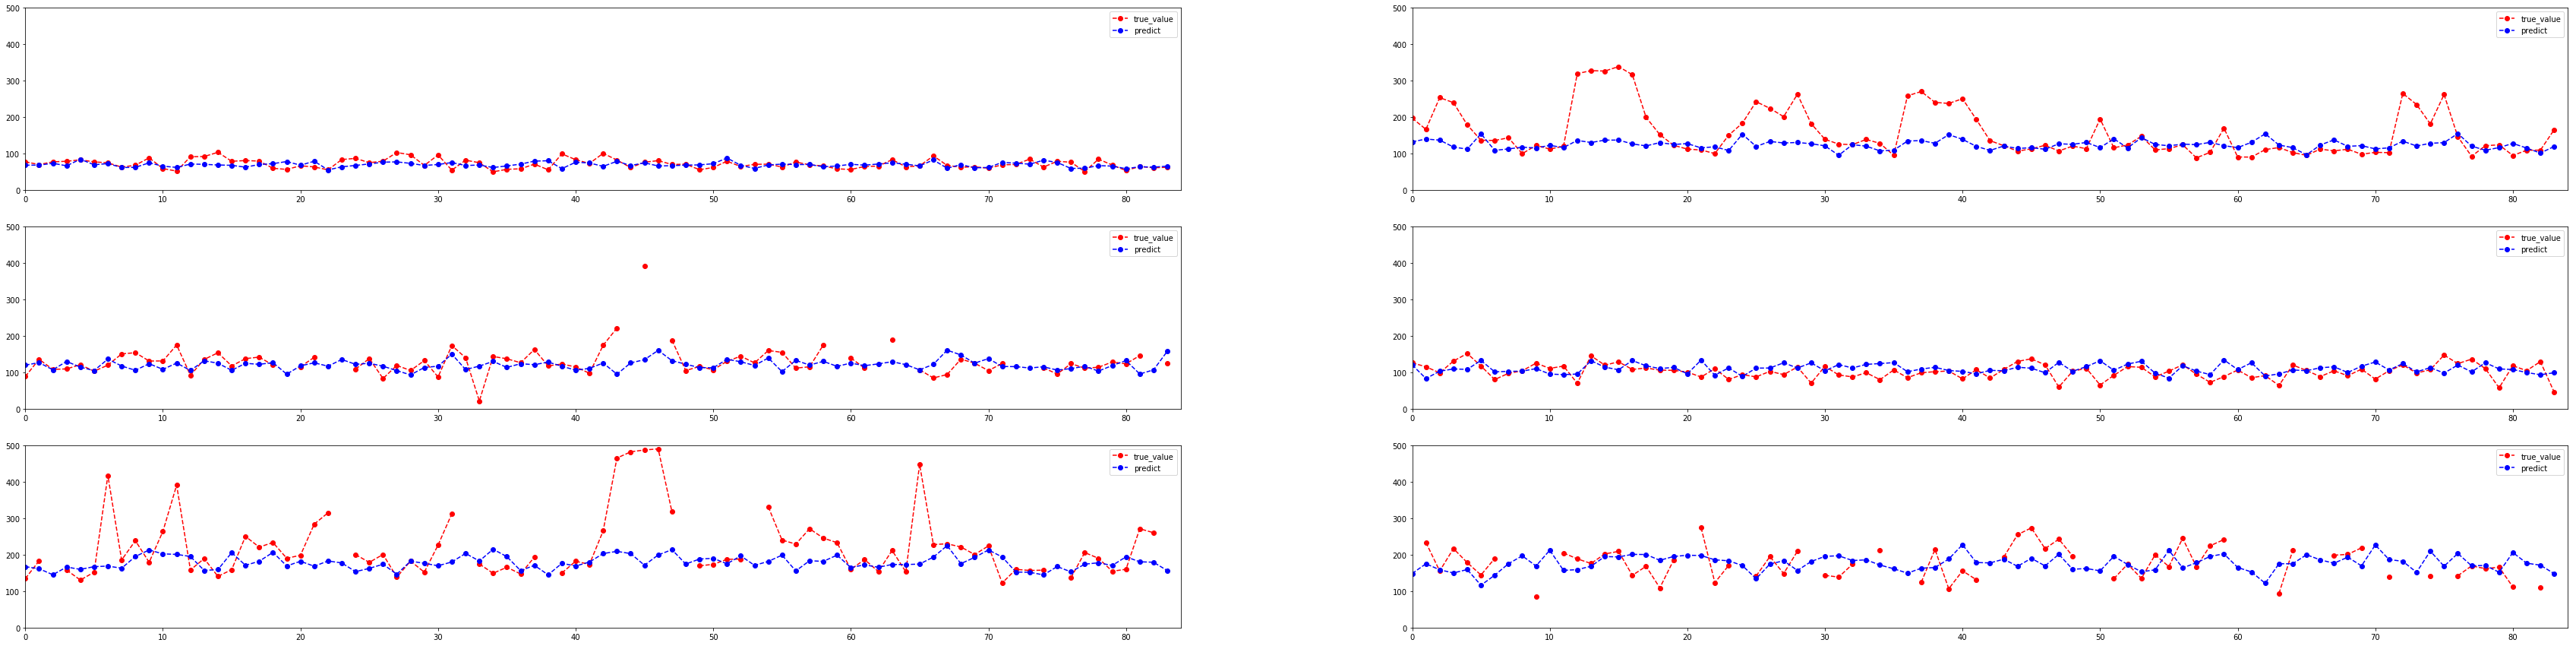

In [29]:
temp = temp1.groupby(['intersection_id', 'tollgate_id'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 500])
    ax.legend()    

In [30]:
# 计算MAPE
temp1 = temp1.dropna()

temp = temp1.groupby(['intersection_id', 'tollgate_id'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

A 2
0.13390413212711222
A 3
0.24374587243954965
B 1
0.2216951417975069
B 3
0.21507948945798067
C 1
0.21097958233877567
C 3
0.2651435131786796


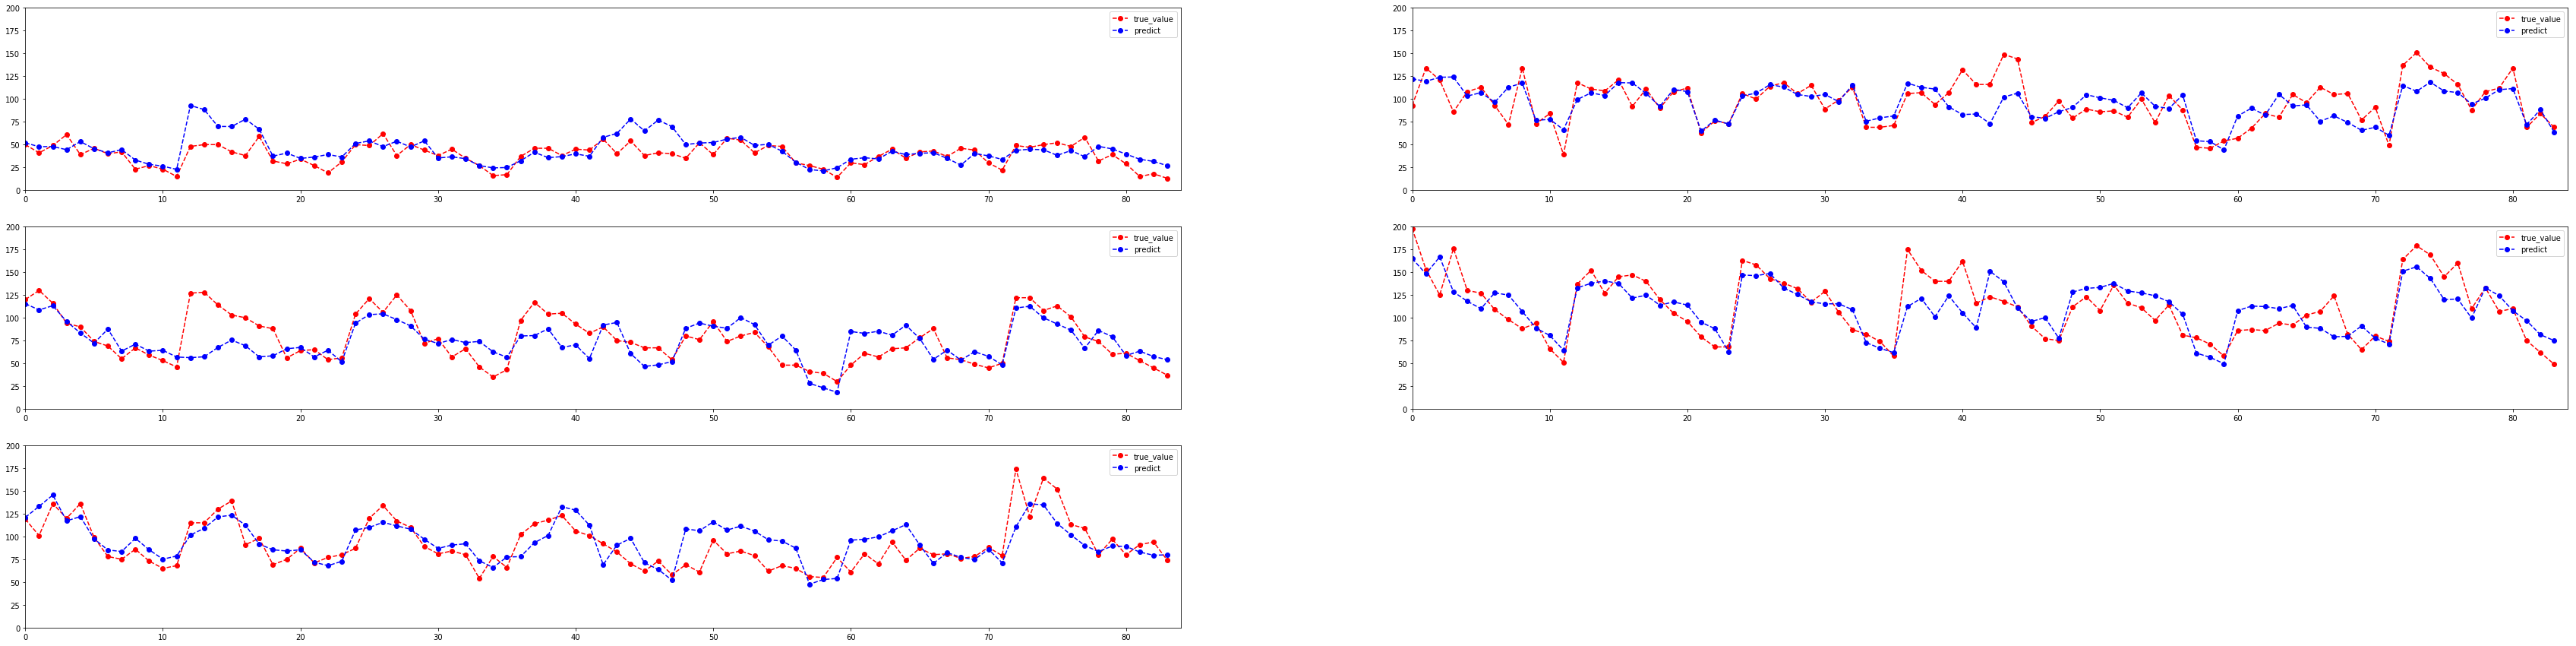

In [31]:
temp = temp2.groupby(['tollgate_id', 'direction'])

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
k = 1
for (k1,k2), group in temp:
    ax = fig.add_subplot(3,2,k)
    k += 1
    ax.plot(np.arange(len(group)), group['true_value'],'r--o', label='true_value')
    ax.plot(np.arange(len(group)), group['predict'],'b--o', label='predict')
    ax.set_xlim([0, 84])
    ax.set_ylim([0, 200])
    ax.legend()    

In [32]:
# 计算MAPE
temp = temp2.groupby(['tollgate_id', 'direction'])
for (k1,k2), group in temp:
    print(k1,k2)
    mape = MAPE(group['true_value'], group['predict'])
    print(mape)

1 0
0.2861413511741762
1 1
0.14688349783639315
2 0
0.2262688566423663
3 0
0.16185815042946874
3 1
0.17293997247501997
